In [1]:
import numpy as np

In [70]:
class LogisticRegression:
    def __init__(self,learning_rate=0.001,n_iterations=1000):
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
        self.weights=None
        self.bias=None
        self.losses=[]

    def scale(self, x_train, x_test):
        from sklearn.preprocessing import StandardScaler  # Fixed import
        scaler = StandardScaler()  # Fixed variable name
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        return x_train_scaled, x_test_scaled
        
    def loss(self,y_act,y_pred):
        epsilon=1e-9
        y1=y_act*np.log(y_pred+epsilon)
        y2=(1-y_act)*np.log(1-y_pred+epsilon)
        return -np.mean(y1+y2)
    
    def sigmoid(self,z):
        result = np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))
        return result
    
    def predict(self,x):
        z=np.dot(x,self.weights)+self.bias
        return self.sigmoid(z)
    
    def fit(self,x,y):
        n_samples,n_features=x.shape

        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iterations):
            A=self.predict(x)
            self.losses.append(self.loss(A,y))
            dz=A-y
            dw=1/n_samples*(np.dot(x.T,dz))
            db=1/n_samples*(np.sum(np.sum(dz)))

            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset=datasets.load_breast_cancer()
x,y=dataset.data,dataset.target

In [72]:
x.size

17070

In [73]:
y.size

569

In [74]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign


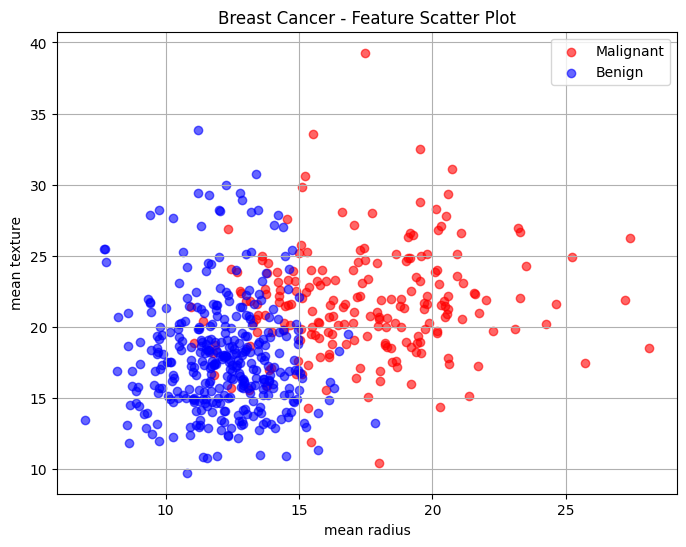

In [75]:
import matplotlib.pyplot as plt

# Select two features to plot
feature_x = 'mean radius'
feature_y = 'mean texture'

plt.figure(figsize=(8, 6))
plt.scatter(df[feature_x][df['target'] == 0], df[feature_y][df['target'] == 0],
            color='red', label='Malignant', alpha=0.6)
plt.scatter(df[feature_x][df['target'] == 1], df[feature_y][df['target'] == 1],
            color='blue', label='Benign', alpha=0.6)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Breast Cancer - Feature Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


In [76]:
x_tarin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
lodReg=LogisticRegression()
x_train, x_test = lodReg.scale(x_tarin, x_test)
lodReg.fit(x_train,y_train)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
predictions = lodReg.predict(x_test)
cm= confusion_matrix(np.asarray(y_test), np.asarray(predictions))
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy: {0:.3f}".format(accuracy))
print("Confusion Matrix:",np.array(cm))

Test accuracy: 0.939
Confusion Matrix: [[42  1]
 [ 6 65]]
